# ObsID : 0945020137, SRCNUM : 21, Instru : EMOS2
Not on Simbad

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [5]:
spec = Spectrum(glob.glob("ObsID*SRCNUM*E*spectrum_grp.fits")[0])


2 spectra  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EMOS2_spectrum_grp.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  2.573e-03 +/- 5.262e-04 (56.5 % total)
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1-3
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.822e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020137_SRCNUM21_EMOS2_background_spectrum.fits
  Background Exposure Time: 1.822e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020137_SRCNUM21_EMOS2.arf



In [3]:
print("Number of counts :", 2.573e-03*1.822e+04)

Number of counts : 46.88006


## Plot spectrum

In [7]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12-**")

     1 channels (1) ignored in spectrum #     2
      No channels ignored (no channels in specified range)



(-0.5, 861.5, 665.5, -0.5)

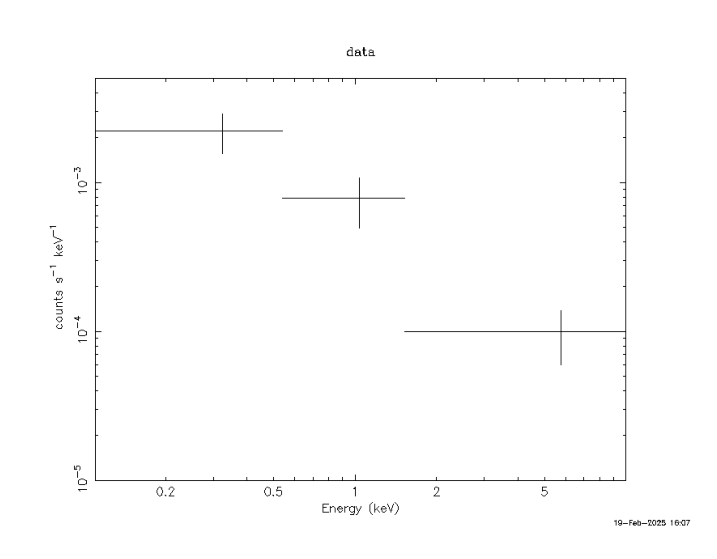

In [4]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum.png")[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [9]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              2.728586e+12     using 3 bins, spec

(-0.5, 866.5, 664.5, -0.5)

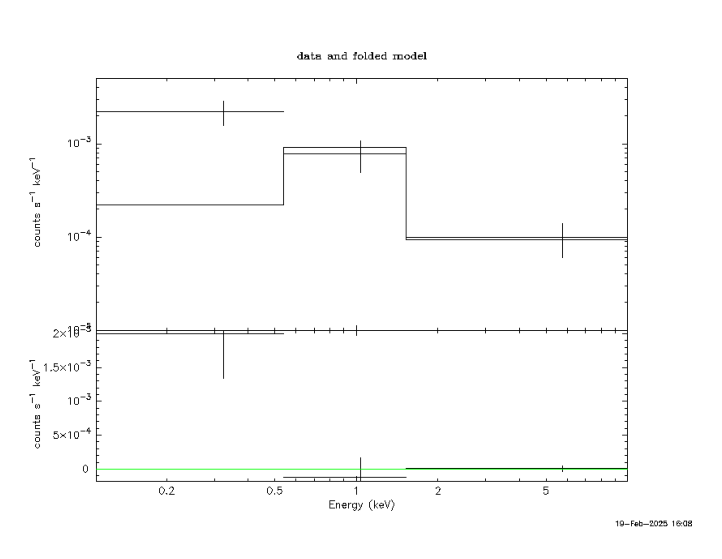

In [6]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.027270e+11     using 3 bins, spectrum 1.
                 Chi-Squared              1.027159e+11     using 2 bins, spectrum 2.
Total fit statistic                       2.054429e+11     with 2 d.o.f.

Test statistic : Chi-Squared              2.054429e+11     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
9.70149      1.14561      -3      0.180416    

(-0.5, 860.5, 662.5, -0.5)

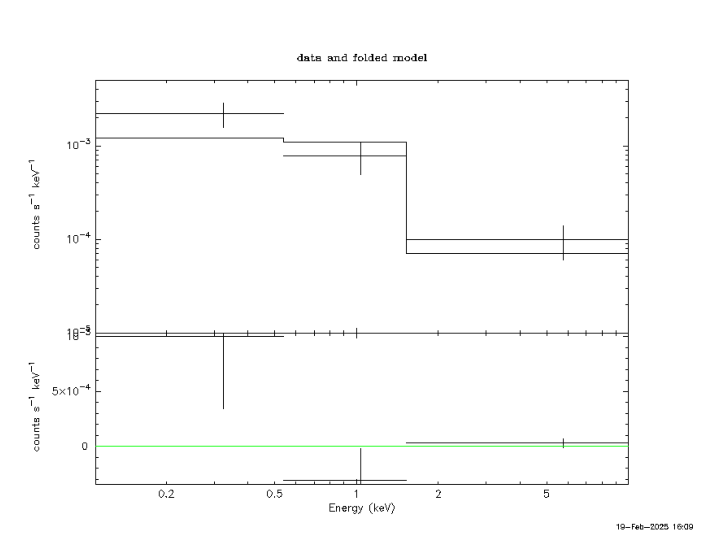

In [8]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.180456e+10     using 3 bins, spectrum 1.
                 Chi-Squared              1.180198e+10     using 2 bins, spectrum 2.
Total fit statistic                       2.360654e+10     with 2 d.o.f.

Test statistic : Chi-Squared              2.360654e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
         

(-0.5, 861.5, 666.5, -0.5)

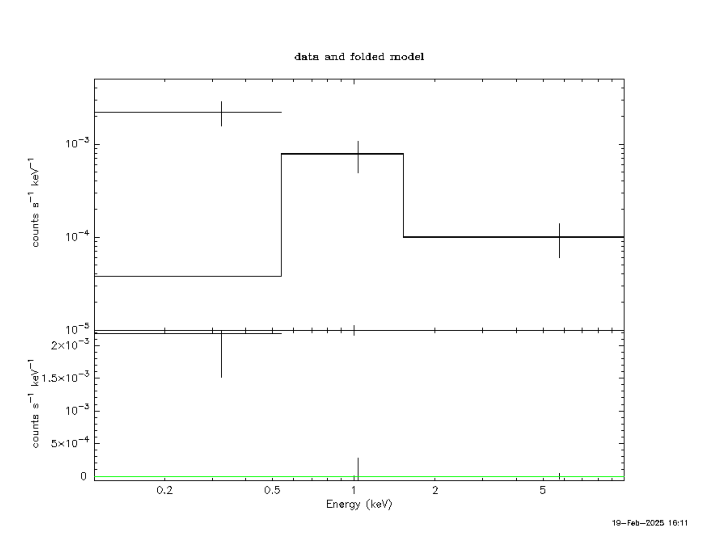

In [10]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec.png")[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [12]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.165339e+11     using 3 bins, spectrum 1.
                 Chi-Squared              7.164849e+11     using 2 bins, spectrum 2.
Total fit statistic                       1.433019e+12     with 2 d.o.f.

Test statistic : Chi-Squared              1.433019e+12     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
16.1883      0.942049     -1      0.139519  

(-0.5, 859.5, 664.5, -0.5)

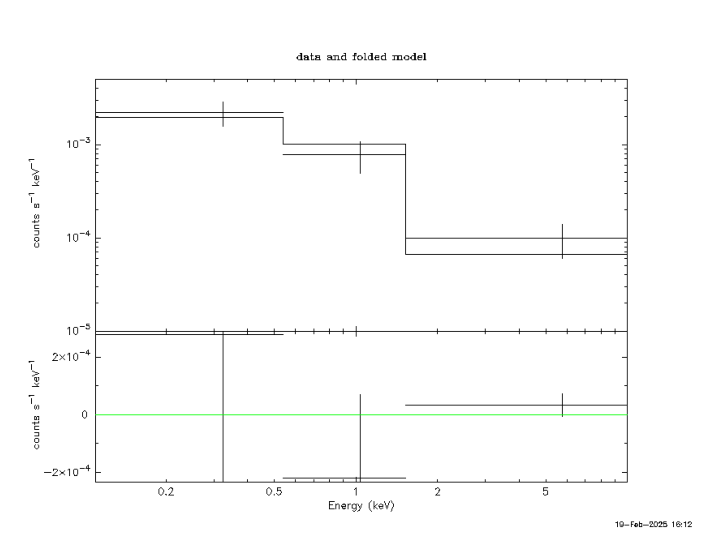

In [12]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_powerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

## ESASky
Aucune distance n'est diponible sur ESASky. https://sky.esa.int/esasky/?target=52.73766666666666%20-28.63463888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.7376939°
- Dec = -28.6344882°

52.74 -28.63

**Column density :** nH = 3*10^20 cm^-2 ?

The different models give a column density of :

- bbody : nH = 5.91267*10^4
- bremss : nH = 1.83446*10^4
- apec : nH = 1.52379*10^22
- powerlaw : nH = 1.47526*10^5

No value corresponds.

## Flux

In [13]:
AllModels.calcFlux(".2 12.0")

Spectrum Number: 1, 2
Data Group Number: 1
 Model Flux 2.3735e-05 photons (3.2547e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
Flux = 3.1601e-14 # ergs/cm^2/s

## Luminosity
No distance available on ESASky.

In [15]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s

print(color.BOLD+"For a star in the milky way? with d=[1 pc - 30 kpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a star in the milky way? with d=[1 pc - 30 kpc] :
Luminosity : [3.7810993687422867e+24, 3.7810993687422864e+30] erg/s


In [16]:
# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s


print(color.BOLD+"For a galaxy? with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a galaxy? with d=[1 Mpc - 10 Gpc] :
Luminosity : [3.781099368742287e+36, 3.781099368742287e+44] erg/s


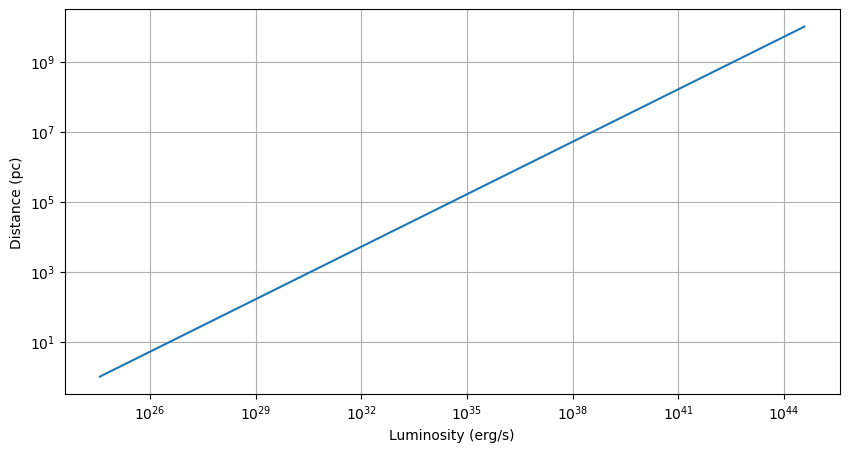

In [17]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L = 4*np.pi*Flux*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L,D_pc)
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()